# Libs

In [8]:
# https://www.kaggle.com/datasets/abdelrahmanahmed110/used-cars-for-sale-in-egypt/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Dataset Details

In [9]:
data = pd.read_csv('./hatla2ee_scraped_data.csv')
df = data.copy()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './hatla2ee_scraped_data.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Price,934
Color,0
Mileage,2119
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [ ]:
df.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,33559,32625,33559,31440,33559,33559,33559,33559,33559,33559,33559,33559,33559
unique,4158,828,24,1084,101,889,103,124,2,2,2,2,22048
top,Nissan Sunny 2022,"650,000 EGP",Black,"200,000 Km",Hyundai,Sunny,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chevrolet/lanos...
freq,647,969,6532,1317,3800,1868,3983,12333,21289,20643,18450,19263,289


# Missings and Duplicates

In [ ]:
# to remove EGP and KM from Price and Mileage
def clean_num(x):
    if type(x) == str:
        return float(x.split()[0].replace(',' , ''))
    else:
        return np.nan
df["Price"] = df["Price"].apply(clean_num)
df["Mileage"] = df["Mileage"].apply(clean_num)

df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,86000.0,Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [ ]:
print(len(df))

df = df.dropna(subset=['Price']) # Remove missing targets
df = df.drop_duplicates() # Remove duplicates
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median()) # Fill missing values with median

print(len(df))

33559
21981


In [ ]:
df.isnull().sum() # GG =))

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


#Feature Selection/Creation

In [ ]:
df = df.drop('Item URL', axis=1) # mlo4 lazma
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,Yes,Yes,Yes,Yes


#### Handle Date_Displayed Column and Date in Name Column

In [ ]:
extracted_years = df['Name'].str.extract(r'(\d{4})', expand=False) # get model year from Name column.
df['Model_Year'] = pd.to_numeric(extracted_years, errors='coerce') # add it as a new column

In [ ]:
df.isnull().sum()

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [ ]:
# Fill NaN Model_Year with the mode of existing years, then convert to int
mode_model_year = int(df['Model_Year'].mode()[0])
df['Model_Year'] = df['Model_Year'].fillna(mode_model_year).astype(int)

In [ ]:
df.isnull().sum() # a5yran

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


### Create New Features Based Date


In [ ]:
# Create New Features
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])
df['Listing_Year'] = df['Date Displayed'].dt.year
df['Listing_Month'] = df['Date Displayed'].dt.month

df['Car_Age'] = df['Listing_Year'] - df['Model_Year']
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Model_Year,Listing_Year,Listing_Month,Car_Age
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,2024,2024,2,0
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,2021,2024,2,3
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,2021,2024,2,3
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,2018,2024,2,6
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,Yes,Yes,Yes,Yes,2021,2024,2,3


### Drop Raw Data

In [ ]:
cols_to_drop = ['Name', 'Date Displayed', 'Model_Year']
df = df.drop(columns=cols_to_drop)

df

,Price,Color,Mileage,Make,Model,City,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Listing_Year,Listing_Month,Car_Age
0,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,Yes,Yes,Yes,Yes,2024,2,0
2,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,Yes,Yes,Yes,Yes,2024,2,3
3,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,Yes,Yes,Yes,Yes,2024,2,3
4,2050000.0,Gray,84000.0,BMW,X1,Cairo,Yes,Yes,Yes,Yes,2024,2,6
5,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,Yes,Yes,Yes,Yes,2024,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,560000.0,White,127000.0,Chery,Arrizo 5,El Haram,Yes,Yes,Yes,Yes,2024,2,4
31735,860000.0,Red,7000.0,Nissan,Sunny,Heliopolis,Yes,Yes,Yes,Yes,2024,2,0
31736,1000000.0,Blue,250000.0,Brilliance,V5,Tagamo3 - New Cairo,Yes,Yes,Yes,Yes,2024,2,11
31737,3650000.0,Black,11000.0,BMW,320,Cairo,Yes,Yes,Yes,Yes,2024,2,1


# Split Before Encoding
As in slides, some encoding methods depends on the mean of target, so if I don't split, the mean of the test dataset will affect the mean of the training dataset. "aka. Data Leakage"

However, I can do label encoding first

### Binary Mapping On Binary Columns First

So I don't need to map them in two steps: the training and testing data.

In [ ]:
binary_cols = ['Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

### Splitting

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding


In [ ]:
# based on the num of unique values h5tar el encoding technique
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 21981 entries, 0 to 31738
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   21981 non-null  float64
 1   Color                   21981 non-null  object 
 2   Mileage                 21981 non-null  float64
 3   Make                    21981 non-null  object 
 4   Model                   21981 non-null  object 
 5   City                    21981 non-null  object 
 6   Automatic Transmission  21981 non-null  int64  
 7   Air Conditioner         21981 non-null  int64  
 8   Power Steering          21981 non-null  int64  
 9   Remote Control          21981 non-null  int64  
 10  Listing_Year            21981 non-null  int32  
 11  Listing_Month           21981 non-null  int32  
 12  Car_Age                 21981 non-null  int64  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 2.7+ MB
None
Price                   

In [ ]:
print(X_train.shape)
print(X_train.columns)
print(len(X_train.columns))
print(f"Number of unique colors {len(X_train['Color'].unique())}")

(17584, 12)
Index(['Color', 'Mileage', 'Make', 'Model', 'City', 'Automatic Transmission',
       'Air Conditioner', 'Power Steering', 'Remote Control', 'Listing_Year',
       'Listing_Month', 'Car_Age'],
      dtype='object')
12
Number of unique colors 24


### Encoding (OneHot, target)

`target_type="continuous"` for target encoding as `Price` Dtype is `float64`




In [ ]:
cols_one_hot = ['Color']
cols_target  = ['Make', 'Model', 'City']

preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cols_one_hot),
        ('target_enc', TargetEncoder(smooth='auto', target_type="continuous"), cols_target)
    ],
    remainder='passthrough' # Keep Mileage, Year, Binary Cols, Car_Age as is
)


In [ ]:
X_train = preprocessor.fit_transform(X_train, y_train)
X_test  = preprocessor.transform(X_test)

# 6. Now X_train_enc is all numbers, ready for Linear Regression!
print("New Shape:", X_train.shape)

New Shape: (17584, 34)


# Scaling

Used `RobustScaler` because Mileage column was skewed.

In [ ]:

# 1. Use RobustScaler (Handles outliers better than StandardScaler)
scaler = RobustScaler()

# 2. Fit ONLY on Training Data
scaler.fit(X_train)

# 3. Transform both
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.88888889,  0.63636364],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.88888889, -0.45454545],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.        ,  0.72727273],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.        ,  0.72727273],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.88888889, -0.72727273],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.63636364]])

# Regression
Used `RandomForestRegressor` because when I used `LinearRegression` as per the slides, the accuracy was low.

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

R_SQUARED = r2_score(y_test, y_pred_rf) # R square
MAE = mean_absolute_error(y_test, y_pred_rf) # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE) # Root Mean Squared Error

NameError: name 'RandomForestRegressor' is not defined

# Visualization

R-squared score: 0.8049
Mean Absolute Error (MAE): 156,170 EGP
Root Mean Squared Error (RMSE): 408,583 EGP


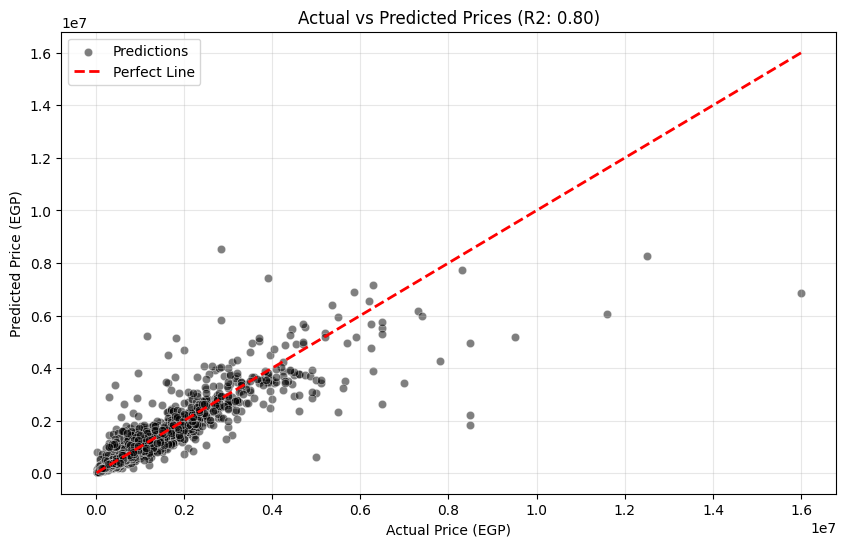

In [ ]:
print(f"R-squared score: {R_SQUARED:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:,.0f} EGP")
print(f"Root Mean Squared Error (RMSE): {RMSE:,.0f} EGP")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='black', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')

plt.xlabel('Actual Price (EGP)')
plt.ylabel('Predicted Price (EGP)')
plt.title(f'Actual vs Predicted Prices (R2: {R_SQUARED:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()